# Data cleaning

In [121]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
#importing data and visualizing head and tail
data = pd.read_excel('stroke_disease.xlsx')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,60744.0,Male,61.0,1.0,0.0,Yes,Self-employed,Rural,76.11,27.3,smokes,1.0
1,64742.0,Male,48.0,0.0,0.0,No,Self-employed,Rural,64.18,32.1,never smoked,0.0
2,44447.0,Male,49.0,0.0,0.0,Yes,Private,Urban,58.19,29.6,smokes,0.0
3,54117.0,Male,7.0,0.0,0.0,NaN,children,Rural,NaN,19.0,NaN,0.0
4,46468.0,FeMALe,38.0,0.0,0.0,Yes,Self-employED,Urban,147.48,NaN,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,20165.0,Female,77.0,0.0,0.0,NaN,Private,Urban,250.80,32.9,never smoked,0.0
996,39375.0,Female,40.0,0.0,0.0,Yes,Private,Rural,119.52,34.6,never smoked,NaN
997,18790.0,Male,25.0,0.0,0.0,No,Private,Urban,85.96,NaN,formerly smoked,0.0
998,NaN,Female,43.0,0.0,0.0,NaN,Self-employed,Urban,89.73,NaN,formerly smoked,0.0


In [123]:
#check data types of variables and unique values
data.dtypes

id                   float64
gender                object
age                  float64
hypertension         float64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke               float64
dtype: object

In [124]:
#checking variable names
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [125]:
data.drop(columns=['id'], inplace=True)

In [126]:
data.columns = ['Gender', 'Age', 'Hypertension', 'Heart Disease','Marriage Status', 'Work Type', 'Residence Type',
                               'Avg Glucose Level', 'BMI', 'Smoking Status', 'Stroke']

In [127]:
data

,Gender,Age,Hypertension,Heart Disease,Marriage Status,Work Type,Residence Type,Avg Glucose Level,BMI,Smoking Status,Stroke
0,Male,61.0,1.0,0.0,Yes,Self-employed,Rural,76.11,27.3,smokes,1.0
1,Male,48.0,0.0,0.0,No,Self-employed,Rural,64.18,32.1,never smoked,0.0
2,Male,49.0,0.0,0.0,Yes,Private,Urban,58.19,29.6,smokes,0.0
3,Male,7.0,0.0,0.0,NaN,children,Rural,NaN,19.0,NaN,0.0
4,FeMALe,38.0,0.0,0.0,Yes,Self-employED,Urban,147.48,NaN,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,Female,77.0,0.0,0.0,NaN,Private,Urban,250.80,32.9,never smoked,0.0
996,Female,40.0,0.0,0.0,Yes,Private,Rural,119.52,34.6,never smoked,NaN
997,Male,25.0,0.0,0.0,No,Private,Urban,85.96,NaN,formerly smoked,0.0
998,Female,43.0,0.0,0.0,NaN,Self-employed,Urban,89.73,NaN,formerly smoked,0.0


In [128]:
#more information about data. 
#number of rows n cols in data.
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             862 non-null    object 
 1   Age                884 non-null    float64
 2   Hypertension       829 non-null    float64
 3   Heart Disease      860 non-null    float64
 4   Marriage Status    859 non-null    object 
 5   Work Type          844 non-null    object 
 6   Residence Type     846 non-null    object 
 7   Avg Glucose Level  851 non-null    float64
 8   BMI                808 non-null    float64
 9   Smoking Status     847 non-null    object 
 10  Stroke             843 non-null    float64
dtypes: float64(6), object(5)
memory usage: 86.1+ KB


(1000, 11)

In [129]:
#Check for missing values
data.isnull().sum()

Gender               138
Age                  116
Hypertension         171
Heart Disease        140
Marriage Status      141
Work Type            156
Residence Type       154
Avg Glucose Level    149
BMI                  192
Smoking Status       153
Stroke               157
dtype: int64

### Gender

In [130]:
#Examining the Gender variable
data['Gender'].value_counts()

Female    487
Male      342
FeMALe     33
Name: Gender, dtype: int64

In [131]:
#correcting  typos in Gender variable
data['Gender'] = data['Gender'].str.strip()
data.loc[data['Gender'] == 'FeMALe', 'Gender'] = 'Female'
data['Gender'] = data['Gender'].fillna('Female')
data['Gender'] = data['Gender'].astype(str)
data['Gender'].value_counts()

Female    658
Male      342
Name: Gender, dtype: int64

### Work Type

In [132]:
#Examining the Work Type variable
data['Work Type'].value_counts()

Private          456
children         135
Self-employed    126
Govt_job         117
Self-employED      7
Never_worked       2
Never_workED       1
Name: Work Type, dtype: int64

In [133]:
#Fixing typos in Work Type variable
data.loc[data['Work Type'] == 'Self-employED', 'Work Type'] = 'Self-employed'
data.loc[data['Work Type'] == 'Never_workED', 'Work Type'] = 'Never worked'
data.loc[data['Work Type'] == 'Never_worked', 'Work Type'] = 'Never worked'
data.loc[data['Work Type'] == 'Govt_job', 'Work Type'] = 'Govt job'
data.loc[data['Work Type'] == 'children', 'Work Type'] = 'Children'
data['Work Type']=data['Work Type'].fillna('Private')
data['Work Type'].value_counts()

Private          612
Children         135
Self-employed    133
Govt job         117
Never worked       3
Name: Work Type, dtype: int64

### Smoking status

In [134]:
#Examining 'Smoking Status' variable
data['Smoking Status'].str.strip()
data['Smoking Status'].value_counts()

never smoked       318
Unknown            277
formerly smoked    139
smokes             113
Name: Smoking Status, dtype: int64

In [135]:
#Fixing responses in smoking status
data.loc[data['Smoking Status'] == 'never smoked', 'Smoking Status'] = 'Non-smoker'
data.loc[data['Smoking Status'] == 'formerly smoked', 'Smoking Status'] = 'Former-smoker'
data.loc[data['Smoking Status'] == 'smokes', 'Smoking Status'] = 'Smoker'
#Assigning 'Unknown' to null vals
data['Smoking Status'] = data['Smoking Status'].fillna('Unknown')
data['Smoking Status'].value_counts()

Unknown          430
Non-smoker       318
Former-smoker    139
Smoker           113
Name: Smoking Status, dtype: int64

### Hypertension

In [136]:
#Examining 'Hypertension' variable
data['Hypertension'].value_counts()

0.0         723
1.0          81
999999.0     25
Name: Hypertension, dtype: int64

In [137]:
#Examining 'Hypertension' variable and replace unusual vals with mode
data.loc[data['Hypertension'] == 999999.0, 'Hypertension'] = 'No'
data.loc[data['Hypertension'] == 0, 'Hypertension'] = 'No'
data.loc[data['Hypertension'] == 1, 'Hypertension'] = 'Yes'
data['Hypertension'] = data['Hypertension'].fillna('No')
data['Hypertension'] = data['Hypertension'].astype(str)
data['Hypertension'].value_counts()

No     919
Yes     81
Name: Hypertension, dtype: int64

### Heart Disease

In [138]:
#Examining 'Heart Disease' variable
data['Heart Disease'].value_counts()

0.0         799
1.0          36
999999.0     25
Name: Heart Disease, dtype: int64

In [139]:
#Examining 'Heart Disease' variable and replace unusual vals with mode
data.loc[data['Heart Disease'] == 999999.0, 'Heart Disease'] = 'No'
data['Heart Disease']=data['Heart Disease'].fillna('No')
data.loc[data['Heart Disease'] == 1, 'Heart Disease'] = 'Yes'
data.loc[data['Heart Disease'] == 0, 'Heart Disease'] = 'No'
data['Heart Disease'] = data['Heart Disease'].astype(str)
data['Heart Disease'].value_counts()

No     964
Yes     36
Name: Heart Disease, dtype: int64

### Marriage Status

In [140]:
#Examining 'Marriage Status' variable
data['Marriage Status'].value_counts()

Yes    554
No     305
Name: Marriage Status, dtype: int64

In [141]:
#Replacing null vals in Marriage Status with Yes
data['Marriage Status']=data['Marriage Status'].fillna('Yes')
data['Marriage Status'].value_counts()

Yes    695
No     305
Name: Marriage Status, dtype: int64

### Residence Type

In [142]:
#Examining 'Residence Type' variable
data['Residence Type'].value_counts()

Rural    426
Urban    420
Name: Residence Type, dtype: int64

In [143]:
#Replacing null vals in Residence Type with Rural
data['Residence Type']=data['Residence Type'].fillna('Rural')
data['Residence Type'].value_counts()

Rural    580
Urban    420
Name: Residence Type, dtype: int64

### Avg Glucose Level

In [144]:
#Examining the Avg Glucose Level variable
data['Avg Glucose Level'].value_counts()

999999.00    25
208.05        2
85.59         2
108.63        2
84.86         2
             ..
110.16        1
74.98         1
66.32         1
65.16         1
217.39        1
Name: Avg Glucose Level, Length: 796, dtype: int64

In [145]:
#Checking for unusual values in 'Avg Glucose Level'
data.loc[data['Avg Glucose Level'] == 999999, 'Avg Glucose Level'] = None
data['Avg Glucose Level'].fillna(data['Avg Glucose Level'].mean(), inplace=True)
data['Avg Glucose Level'].value_counts()

107.543995    174
85.590000       2
79.890000       2
90.220000       2
56.110000       2
             ... 
110.160000      1
74.980000       1
66.320000       1
65.160000       1
217.390000      1
Name: Avg Glucose Level, Length: 796, dtype: int64

### BMI

In [146]:
#Examining the BMI variable
data['BMI'].value_counts()

27.7    9
26.1    9
24.1    8
19.5    8
28.7    8
       ..
16.0    1
52.3    1
34.1    1
40.6    1
50.6    1
Name: BMI, Length: 281, dtype: int64

In [147]:
#Assigning mean to N/A values
data.loc[data['BMI'] == 'N/A', 'BMI'] = None
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
#Converting datatype to float
data['BMI'] = data['BMI'].astype(float)
data['BMI'].dtypes

dtype('float64')

### Stroke

In [148]:
#Examining the 'Stroke' variable
data['Stroke'].value_counts()

0.0         776
1.0          42
999999.0     25
Name: Stroke, dtype: int64

In [149]:
#Fixing the unusual values
data.loc[data['Stroke'] == 999999.0, 'Stroke'] = None
data.loc[data['Stroke'] == 0.0, 'Stroke'] = 'No'
data.loc[data['Stroke'] == 1.0, 'Stroke'] = 'Yes'
data['Stroke'].fillna('No', inplace=True)
#Changing datatype from float to string
data['Stroke'] = data['Stroke'].astype(str)
data['Stroke'].value_counts()

No     958
Yes     42
Name: Stroke, dtype: int64

### Age

In [150]:
# Examine the 'Age' variable and replace unusual values with 0
data.loc[data['Age'] == 999999.0, 'Age'] = None
data.fillna(data['Age'].mean(), inplace=True)
# Convert to correct data type
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
# Round ages 
data['Age'] = np.floor(data['Age'])

In [151]:
data['Age'].value_counts()

42.0    154
50.0     19
38.0     17
48.0     17
45.0     15
       ... 
11.0      5
77.0      5
76.0      5
4.0       4
12.0      4
Name: Age, Length: 83, dtype: int64

In [152]:
#Checking consistency between Age and Marriage Status
d=data['Marriage Status'][data['Age']<18]
d.value_counts()

No     131
Yes     27
Name: Marriage Status, dtype: int64

In [153]:
marr = data[(data["Age"] < 18) & (data["Marriage Status"] == "Yes")]
data.loc[marr.index, "Marriage Status"] = "No"

In [154]:
#Checking consistency between Age and Work Type
d=data['Work Type'][data['Age']<18]
d.value_counts()

Children         116
Private           38
Self-employed      2
Never worked       2
Name: Work Type, dtype: int64

In [155]:
#For age under 18, with active work status, change to children status
#Changing under 18 Former-smoker, Unknown to Non-smoker
work_child = data[(data["Age"] < 18) & (data["Work Type"] == "Private")]
data.loc[work_child.index, "Work Type"] = "Children"

work_child = data[(data["Age"] < 18) & (data["Work Type"] == "Self-employed")]
data.loc[work_child.index, "Work Type"] = "Children"

work_child = data[(data["Age"] < 18) & (data["Work Type"] == "Govt job")]
data.loc[work_child.index, "Work Type"] = "Children"

work_child = data[(data["Age"] < 18) & (data["Work Type"] == "Null")]
data.loc[work_child.index, "Work Type"] = "Children"

work_child = data[(data["Age"] < 18) & (data["Work Type"] == "Never-worked")]
data.loc[work_child.index, "Work Type"] = "Children"

In [156]:
#Checking consistency between Age and Smoking Status
d=data['Smoking Status'][data['Age']<18]
d.value_counts()

Unknown          133
Non-smoker        18
Former-smoker      5
Smoker             2
Name: Smoking Status, dtype: int64

In [157]:
#Changing under 18 Former-smoker, Unknown to Non-smoker
minor_former_smoker_rows = data[(data["Age"] < 18) & (data["Smoking Status"] == "Former-smoker")]
data.loc[minor_former_smoker_rows.index, "Smoking Status"] = "Non-smoker"

minor_former_smoker_rows_1 = data[(data["Age"] < 18) & (data["Smoking Status"] == "Unknown")]
data.loc[minor_former_smoker_rows_1.index, "Smoking Status"] = "Non-smoker"

minor_former_smoker_rows_2 = data[(data["Age"] < 18) & (data["Smoking Status"] == "Smoker")]
data.loc[minor_former_smoker_rows_2.index, "Smoking Status"] = "Non-smoker"

In [206]:
###analyzing statistical measures
data.describe()

,Age,Avg Glucose Level,BMI
count,1000.000000,1000.000000,1000.000000
mean,42.004000,107.543995,28.838614
std,20.886988,41.848472,7.190133
min,0.000000,55.260000,13.700000
25%,28.000000,80.997500,24.375000
50%,42.000000,99.565000,28.838614
75%,57.000000,110.305000,32.025000
max,82.000000,266.590000,64.400000


In [158]:
data.to_csv("Final clean data.csv")

# Research questions

**Research question 1:**
How is the probability of getting a stroke affected by a person's smoking status?

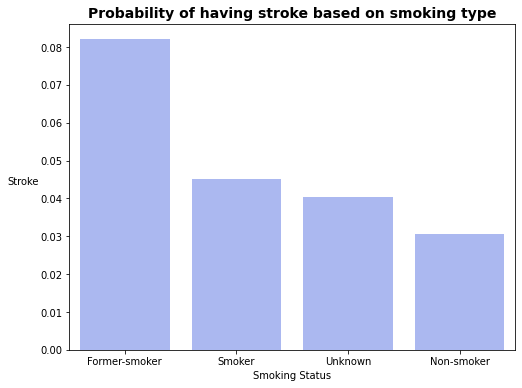

In [159]:
###Drawing a bar plot with decreasing order of bar length
color=['#ebad86','#cdf594','#e67eaf','#9fb1fb','#60f5d7']
c=['#9fb1fb']
plt.figure(figsize=(8,6))
a=sns.barplot(data=data.replace({'Yes': 1, 'No': 0}), order=['Former-smoker','Smoker','Unknown','Non-smoker'],
            x='Smoking Status', y='Stroke',ci=None, palette=c)
plt.ylabel('Stroke', rotation=0, labelpad=17)
a.set_title('Probability of having stroke based on smoking type', position=[0.5,1.1], fontsize=14, weight="bold")
plt.show()

**Research question 2:**
Do the BMI value and smoking affect the appearance of human hypertension?

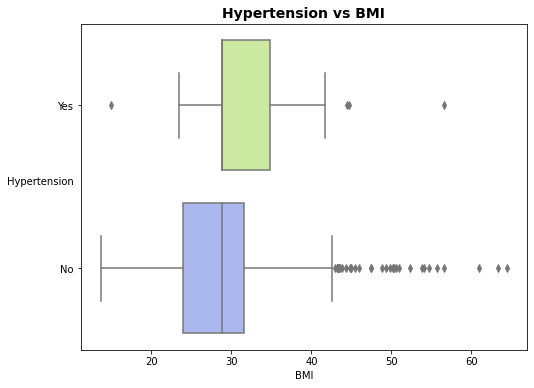

In [194]:
###Boxplot of Hypertension vs BMI
plt.figure(figsize=(8,6))
c1=['#cdf594','#9fb1fb']
b=sns.boxplot(data=data, y='Hypertension', x='BMI', palette=c1)
plt.ylabel('Hypertension', rotation=0, labelpad=17)
b.set_title('Hypertension vs BMI', position=[0.5,1.1], fontsize=14, weight='bold')
plt.show()

**Research question 3:**
Is there a connection between a person having heart disease and having a stroke?


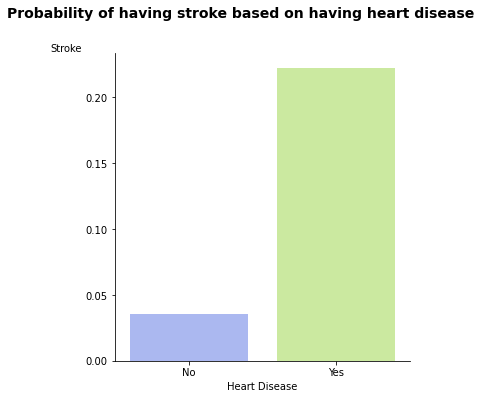

In [198]:
###Heart disease vs stroke
c12=['#9fb1fb','#cdf594']
d=sns.catplot(data=data.replace({'Yes': 1, 'No': 0}), y='Stroke', x="Heart Disease", kind="bar", ci=None, hue_order=['Yes','No'], palette=c12)
plt.ylabel('Stroke', rotation=0, loc='top')
plt.xticks([1, 0], labels=['Yes', 'No'])
d.fig.suptitle('Probability of having stroke based on having heart disease', position=[0.5,1.1], fontsize=14, weight='bold')
plt.show()

**Research question 4:**
How do the average glucose level and BMI values between people differ depending on their marriage status and gender?


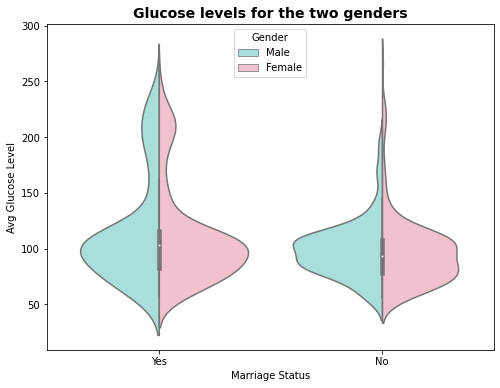

In [162]:
###Drawing a split violin plot for glucose levels in different genders
c2=['#a0e7e1','#f9b9cb']
plt.figure(figsize=(8,6))
e=sns.violinplot(x='Marriage Status', y='Avg Glucose Level', hue='Gender', data=data, palette=c2, ci=None, split="Gender")
e.set_title('Glucose levels for the two genders', position=[0.5,1.1], fontsize=14, weight='bold')
sns.move_legend(e, "upper center")

Text(0.5, 1.0, 'BMI for the two genders')

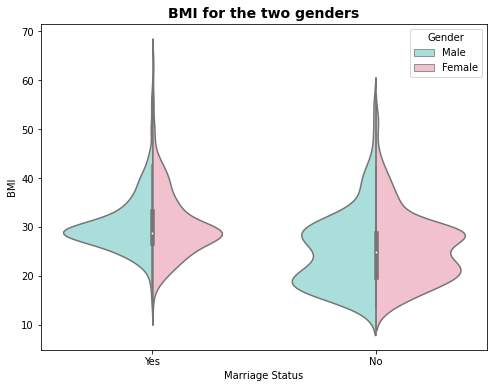

In [163]:
###Drawing split violin plot for BMI in the two genders
plt.figure(figsize=(8,6))
f=sns.violinplot(x='Marriage Status', y='BMI', hue='Gender', data=data, palette=c2, ci=None, split="Gender")
f.set_title('BMI for the two genders', position=[0.5,1.1], fontsize=14, weight='bold')

**Research question 5:**
Does BMI remain constant among work type? Which work type results in a healthy BMI?


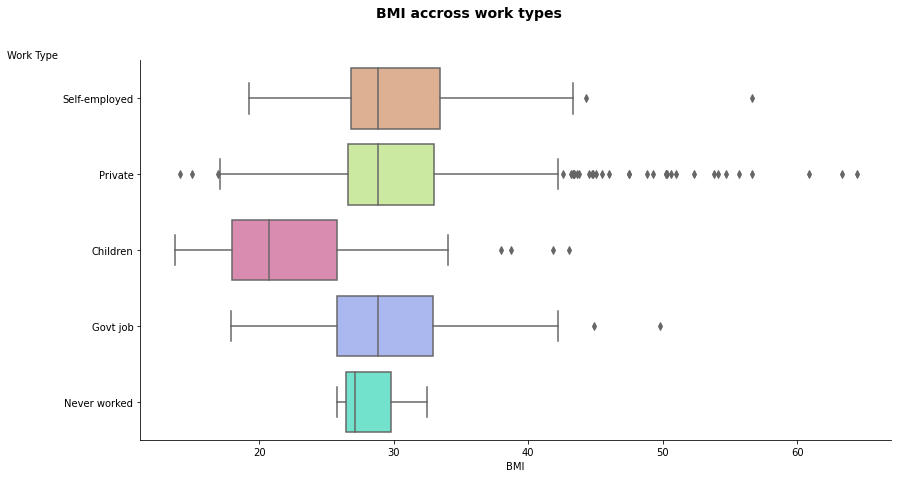

In [164]:
###boxplot of work type vs BMI
h=sns.catplot(kind='box', data=data, y='Work Type', x='BMI', palette=color, height=6, aspect=2)
plt.ylabel('Work Type', rotation=0, loc='top')
h.fig.suptitle('BMI accross work types', position=[0.5,1.1], fontsize=14, weight='bold')
plt.show()

**Research question 6:** Are older people more prone to Hypertension?

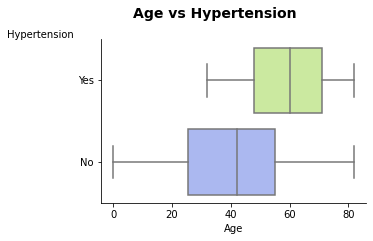

In [199]:
###Drawing boxplot of Age vs Hypertension
i=sns.catplot(kind='box', data=data, y='Hypertension', x='Age', palette=c1, height=3, aspect=1.5)
plt.ylabel('Hypertension', rotation=0, loc='top')
i.fig.suptitle('Age vs Hypertension', position=[0.5,1.1], fontsize=14, weight='bold')
plt.show()

**Research question 7:**
Are smokers more prone to hypertension than other smoking status?


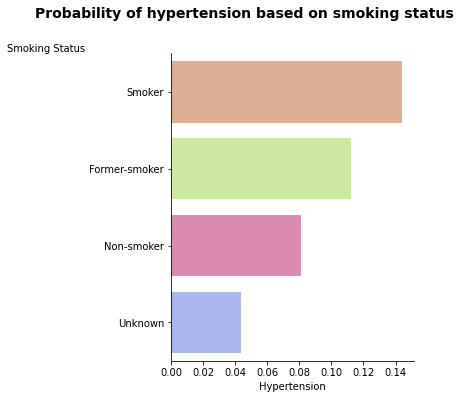

In [166]:
###Horizontal barplot of smoking status vs hypertension
c=sns.catplot(data=data.replace({'Yes': 1, 'No': 0}), order=['Smoker', 'Former-smoker', 'Non-smoker', 'Unknown'],
            x="Hypertension", y="Smoking Status", kind="bar", ci=None, palette=color)
plt.ylabel('Smoking Status', rotation=0, loc='top')
c.fig.suptitle('Probability of hypertension based on smoking status', position=[0.5,1.1], fontsize=14, weight='bold')
plt.show()

**Research question 8:**
Does glucose level vary with smoking status?

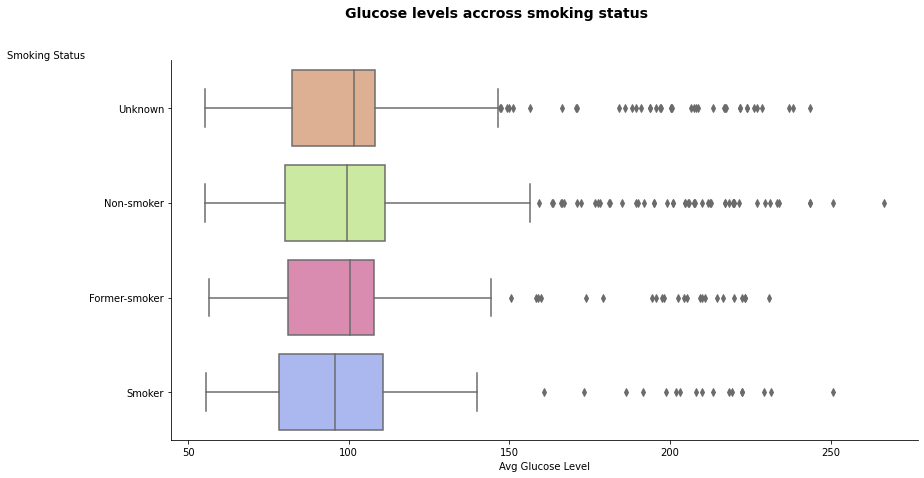

In [167]:
#удалить
###Boxplot of glucose level vs smoking status
g=sns.catplot(kind='box', data=data, order=['Unknown', 'Non-smoker', 'Former-smoker', 'Smoker'],
            y='Smoking Status', x='Avg Glucose Level', palette=color, height=6, aspect=2)
plt.ylabel('Smoking Status', rotation=0, loc='top')
g.fig.suptitle('Glucose levels accross smoking status', position=[0.5,1.1], fontsize=14, weight='bold')
plt.show()

**Research question 9:**
Does marriage increase the probability of a stroke?


<Figure size 432x432 with 0 Axes>

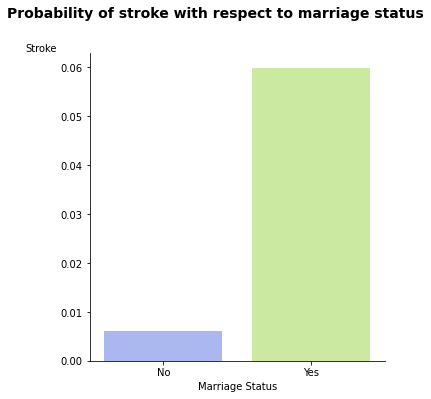

In [201]:
###Bar plot of marriage status vs stroke
plt.figure(figsize=(6,6))
g=sns.catplot(data=data.replace({'Yes': 1, 'No': 0}), x='Marriage Status', y="Stroke", kind="bar", ci=None, palette=c12)
plt.ylabel('Stroke', rotation=0, loc='top')
plt.xticks([0, 1], labels=['No', 'Yes'])
g.fig.suptitle('Probability of stroke with respect to marriage status', position=[0.5,1.1], fontsize=14, weight='bold')
plt.show()

**Research question 10:** Is stroke more common in younger or older people?

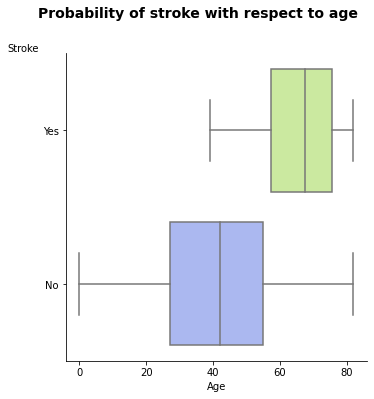

In [202]:
###Drawing boxplot of stroke vs age
j=sns.catplot(kind='box', data=data, y='Stroke', x='Age', palette=c1)
plt.ylabel('Stroke', rotation=0, loc='top')
j.fig.suptitle('Probability of stroke with respect to age', position=[0.5,1.1], fontsize=14, weight='bold')
plt.show()

**Research question 11:** What is the distribution of Avg Glucose Level? Is it affected by gender?

Text(0.5, 1.0, 'Distribution of glucose level for the two genders')

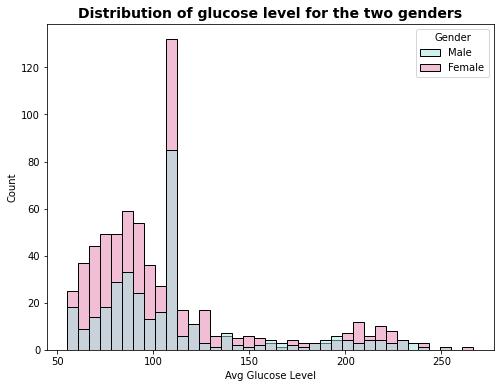

In [177]:
#удалить
c3=['#a0e7e1','#e67eaf']
plt.figure(figsize=(8,6))
j=sns.histplot(data=data, x='Avg Glucose Level', hue='Gender', alpha=0.5, palette=c3)
j.set_title('Distribution of glucose level for the two genders', position=[0.5,1.1], fontsize=14, weight='bold')

**Research question 12:** Does residence type affect diet and consequently the Avg Glucose Level?

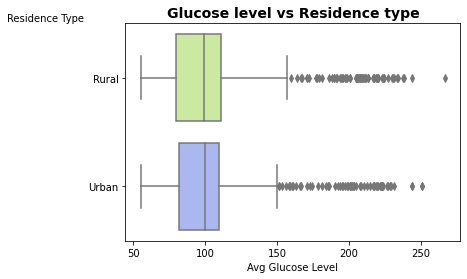

In [203]:
#удалить
k=sns.boxplot(data=data, y='Residence Type', x='Avg Glucose Level', palette=c1)
plt.ylabel('Residence Type', rotation=0, loc='top')
k.set_title('Glucose level vs Residence type', position=[0.5,1.1], fontsize=14, weight='bold')
plt.show()

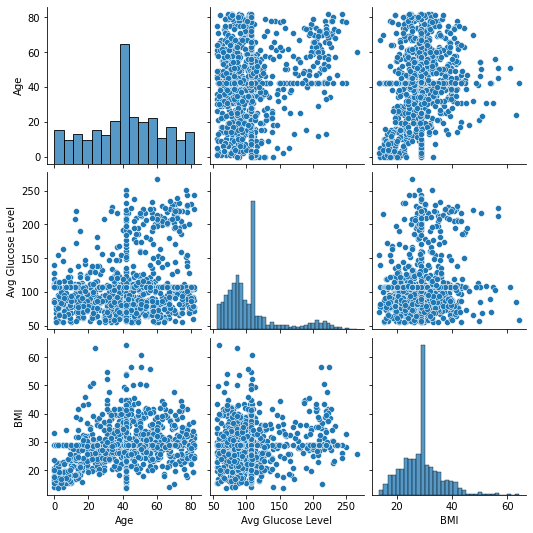

In [172]:
###Any other interesting phenomenon?
sns.pairplot(data=data)

**Research question 13:**
How does Avg glucose level vary with age, is there another factor affecting it?

<AxesSubplot: xlabel='Age', ylabel='Avg Glucose Level'>

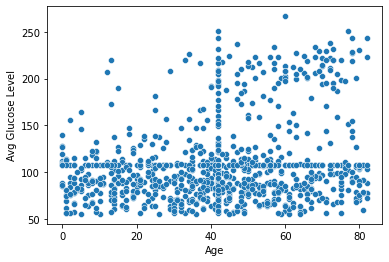

In [173]:
###create clusters
sns.scatterplot(data=data, x='Age', y='Avg Glucose Level')

**Research question 14:**
Does hypertension increase the chance of a stroke?

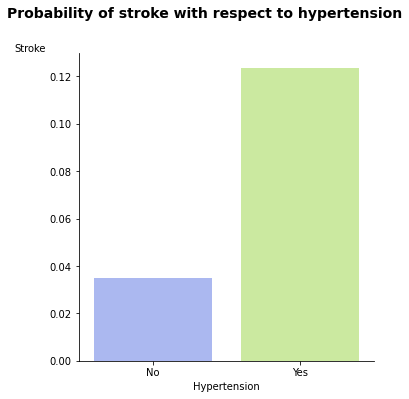

In [205]:
l=sns.catplot(data=data.replace({'Yes': 1, 'No': 0}), x='Hypertension', y="Stroke", kind="bar", ci=None, palette=c12)
plt.ylabel('Stroke', rotation=0, loc='top')
plt.xticks([0, 1], labels=['No', 'Yes'])
l.fig.suptitle('Probability of stroke with respect to hypertension', position=[0.5,1.1], fontsize=14, weight='bold')
plt.show()